In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lregr
arbres = pd.read_csv("p2-arbres-fr.csv", sep=";")

# Apercu rapide

---
Grace à Panda 🐼, nous allons pouvoir observer un rapide aperçu de notre DataFrame et ceux par la fonction suivante:
```
notre_variable.head()
```


> *La fonction  `.tail()`  est le pendant de la fonction `.head()`  . Elle permet d'afficher les derniers éléments du DataFrame.*

Ici, nous pouvons déjà observer que certaines colonnes &| lignes possèdent des valeurs vides 🕳 representées par `NaN`.
 



In [21]:
arbres.shape

(200137, 18)

In [22]:
arbres.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [23]:
arbres.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


## **Demonstration de fonction**

[🐼 toute la doc des Fonctions ](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html)

> **.unique()**
```
notre_variable.selection_entete.unique()
```
Qui comme son nom l'indique retourne des valeurs sans doublons

In [24]:
arbres.libelle_francais.unique()

array(['Marronnier', 'If', 'Erable', 'Arbre à miel', 'Platane', 'Sophora',
       'Prunus n. sp.', 'Hêtre', 'Micocoulier', 'Tilleul', 'Chêne',
       'Savonnier', 'Copalme', 'Noyer', 'Arbre à caramel', 'Troene',
       'Tulipier', 'Pin', 'Sapin', 'Cerisier à fleurs', 'Charme-Houblon',
       'Cèdre', 'Paulownia', 'Thuya', 'Pommier à fleurs', 'Poirier',
       'Pommier', 'Bouleau', 'Orme', 'Arbre de Judée', 'Robinier',
       'Frêne', 'Aubépine', 'Fevier', 'Prunier à fleurs',
       'Arbre aux quarante écus', 'Néflier commun', 'Saule', 'Magnolia',
       'Prunier à fruits', 'Poirier à fleurs', 'Peuplier', 'Faux-cyprès',
       'Aubepine', nan, 'Plaqueminier', 'Mûrier', 'Pêcher', 'Pterocarya',
       'Merisier', 'Noisetier de Byzance', 'Alisier', 'Cognassier',
       'Parrotie de Perse - Arbre de fer', 'Poirier à fruits',
       'Orme de Sibérie', 'Frêne à fleurs', 'Aulne', 'Troëne',
       'Fontanesia', 'Cornouiller', 'Cedrele', 'Catalpa', 'Houx', 'Buis',
       'Metaséquoia', 'Chicot d

>**.describe()**
```
notre_variable.describe()
```
Fonction des plus interessantes, qui va nous donner différentes statistiques sur les données contenues dans chaque colonne.

In [25]:
# L'argument include="all" sert à inclure les colonnes non-numérique dans 
# l'analyse
#arbres.describe(include="all")
# sinon ci-dessous nous affiche seulement quand il y a une stat en retour.
arbres.describe()


,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [26]:
arbres.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


# Données manquantes

---


> Lors de l'affichage rapide on a remarqué l'absence de données par l'apparition de la valeur : `NaN` (plus précisément c'est que la valeur présente n'est pas en corrélation avec le type attendu : Not a Number)
l'effet cascade dans les operations arithmétiques nous oblige à les gerer, plus exactement l'isoler.
pour ce faire deux possibilités entre autres :


*   remplacer les NaN par d'autres valeurs


```
notre_variable.fillna(value={"Non_de_la_colonne": valeur_de_remplacement}).nom_colonne.fonction()
notre_variable.fillna(method="pad").nom_colonne.fonction() # utilise la valeur précédente 
```

In [27]:
arbres.libelle_francais.tail(20)

200117                  Chêne
200118                  Chêne
200119           Plaqueminier
200120                    NaN
200121                    NaN
200122                  Frêne
200123                 Mélèze
200124                 Mélèze
200125                Tilleul
200126                Tilleul
200127             Marronnier
200128                    NaN
200129                    NaN
200130                  Chêne
200131                   Orme
200132                    NaN
200133    Arbre aux mouchoirs
200134               Peuplier
200135                  Chêne
200136              Raisinier
Name: libelle_francais, dtype: object

In [28]:
# remplacer par des chaines vides
arbres.fillna(value={"libelle_francais": ''}).libelle_francais.tail(20)

200117                  Chêne
200118                  Chêne
200119           Plaqueminier
200120                       
200121                       
200122                  Frêne
200123                 Mélèze
200124                 Mélèze
200125                Tilleul
200126                Tilleul
200127             Marronnier
200128                       
200129                       
200130                  Chêne
200131                   Orme
200132                       
200133    Arbre aux mouchoirs
200134               Peuplier
200135                  Chêne
200136              Raisinier
Name: libelle_francais, dtype: object

In [29]:
# pour l'exemple loin d'etre pertinant dans ce cas
arbres.fillna(method="pad").libelle_francais.tail(20)

200117                  Chêne
200118                  Chêne
200119           Plaqueminier
200120           Plaqueminier
200121           Plaqueminier
200122                  Frêne
200123                 Mélèze
200124                 Mélèze
200125                Tilleul
200126                Tilleul
200127             Marronnier
200128             Marronnier
200129             Marronnier
200130                  Chêne
200131                   Orme
200132                   Orme
200133    Arbre aux mouchoirs
200134               Peuplier
200135                  Chêne
200136              Raisinier
Name: libelle_francais, dtype: object


*   la fonction  dropna  permet de supprimer les axes (colonnes ou lignes) qui contiennent des NaN. Par défaut, elle supprime les lignes concernées:
```
ma_variable.dropna().mafonction()
```

In [30]:
arbres.libelle_francais.dropna().tail(20) # !!! attention à bien préciser la/les colonnes où l'on veut appliquer la fonction. le paramétre "AXIS" permet d'agir sur les colonnes.

200112                  Chêne
200113                  Chêne
200114                  Chêne
200115                  Chêne
200116                  Chêne
200117                  Chêne
200118                  Chêne
200119           Plaqueminier
200122                  Frêne
200123                 Mélèze
200124                 Mélèze
200125                Tilleul
200126                Tilleul
200127             Marronnier
200130                  Chêne
200131                   Orme
200133    Arbre aux mouchoirs
200134               Peuplier
200135                  Chêne
200136              Raisinier
Name: libelle_francais, dtype: object

# Tableaux croisés dynamiques
---
Ou table pivot : la synthétisation  des données.


```
ma_variable.pivot_table('non_colonne', index='un_autre_colonne', columns='et_une_dernière') 
```
[🐼 table pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [31]:
arbres.espece.describe(include="all")

count          198385
unique            539
top       x hispanica
freq            36409
Name: espece, dtype: object

In [32]:
arbres.genre.describe(include="all")

count       200121
unique         175
top       Platanus
freq         42591
Name: genre, dtype: object

In [33]:
arbres.libelle_francais.describe(include="all")

count      198640
unique        192
top       Platane
freq        42508
Name: libelle_francais, dtype: object

In [34]:
arbres.pivot_table("hauteur_m", index='arrondissement', columns='libelle_francais', aggfunc=np.max, fill_value=0, observed=True) # !! pas de valeur numérique 
# arbres.arrondissement

libelle_francais,Abelia,Abricotier,Ailante,Alangium,Alisier,Althéa,Amandier,Amla,Amélanchier,Andromède,...,Tapiscia,Thuya,Tilleul,Troene,Troëne,Tsuga,Tulipier,Viorne,Virgilier,Xanthoceras
arrondissement,,,,,,,,,,,,,,,,,,,,,
BOIS DE BOULOGNE,0,0,0,0,5,0,0,0,0,0,...,0,0,54,0,0,0,0,0,0,0
BOIS DE VINCENNES,0,0,16,0,6,0,0,0,0,0,...,0,13,881818,7,8,0,20,0,0,0
HAUTS-DE-SEINE,0,0,0,0,0,0,0,0,0,0,...,0,12,18,0,0,0,5,0,0,0
PARIS 10E ARRDT,0,0,20,0,5,0,3,0,0,0,...,0,15,20,0,0,0,9,0,0,0
PARIS 11E ARRDT,0,2,20,0,0,0,5,0,6,0,...,0,10,65,8,0,0,15,0,0,0
PARIS 12E ARRDT,0,1,105,3,5,0,5,0,5,0,...,0,10,55,5,5,0,30,0,0,0
PARIS 13E ARRDT,0,5,20,0,17,4,5,0,5,0,...,0,14,120,7,4,0,45,0,0,0
PARIS 14E ARRDT,0,1,20,0,9,0,0,0,5,0,...,0,17,31,8,5,0,26,0,6,0
PARIS 15E ARRDT,0,3,16,0,14,0,0,0,8,0,...,0,8,70,7,0,0,14,0,5,0


### Le résultat est un DataFrame multi-indexé:

In [35]:
hauteur = pd.cut(arbres['hauteur_m'],[0,15,35])
arbres.pivot_table('circonference_cm', ['arrondissement', hauteur], columns='libelle_francais', aggfunc=np.max, fill_value=0, observed=True)

libelle_francais             Abelia  Abricotier  Ailante  Alangium  Alisier  \
arrondissement    hauteur_m                                                   
BOIS DE BOULOGNE  (0, 15]         0           0        0         0       20   
                  (15, 35]        0           0        0         0        0   
BOIS DE VINCENNES (0, 15]         0           0        0         0       30   
                  (15, 35]        0           0      110         0        0   
HAUTS-DE-SEINE    (0, 15]         0           0        0         0        0   
                  (15, 35]        0           0        0         0        0   
PARIS 10E ARRDT   (0, 15]         0           0      180         0       20   
                  (15, 35]        0           0      195         0        0   
PARIS 11E ARRDT   (0, 15]         0          20       95         0        0   
                  (15, 35]        0           0      150         0        0   
PARIS 12E ARRDT   (0, 15]         0          15      170        20       55   
                  (15, 35]        0           0      180         0        0   
PARIS 13E ARRDT   (0, 15]         0          35      240         0       90   
                  (15, 35]        0           0      230         0      115   
PARIS 14E ARRDT   (0, 15]         0          15      320         0      195   
                  (15, 35]        0           0      184         0        0   
PARIS 15E ARRDT   (0, 15]         0          20      300         0      112   
                  (15, 35]        0           0      165         0        0   
PARIS 16E ARRDT   (0, 15]         0          10      290         0       50   
                  (15, 35]        0           0      495         0        0   
PARIS 17E ARRDT   (0, 15]         0          70      130         0       55   
                  (15, 35]        0           0      150         0        0   
PARIS 18E ARRDT   (0, 15]         0          20      170         0       15   
                  (15, 35]        0           0      345         0        0   
PARIS 19E ARRDT   (0, 15]         0          12      189         0      105   
                  (15, 35]        0           0      250         0        0   
PARIS 1ER ARRDT   (0, 15]         0           0      220         0       25   
                  (15, 35]        0           0        0         0        0   
PARIS 20E ARRDT   (0, 15]         0          20      430         0       20   
                  (15, 35]        0           0      240         0        0   
PARIS 2E ARRDT    (0, 15]         0           0        0         0        0   
                  (15, 35]        0           0        0         0        0   
PARIS 3E ARRDT    (0, 15]        20           0        0         0       45   
                  (15, 35]        0           0        0         0        0   
PARIS 4E ARRDT    (0, 15]         0           0        0         0        0   
                  (15, 35]        0           0       85         0        0   
PARIS 5E ARRDT    (0, 15]         0          15      150         0        0   
                  (15, 35]        0           0      200         0        0   
PARIS 6E ARRDT    (0, 15]         0           0        0         0        0   
                  (15, 35]        0           0        0         0        0   
PARIS 7E ARRDT    (0, 15]        75          15      140         0       76   
                  (15, 35]        0           0      215         0        0   
PARIS 8E ARRDT    (0, 15]         0           0       75         0       20   
                  (15, 35]        0           0        0         0        0   
PARIS 9E ARRDT    (0, 15]         0           0      100         0       63   
                  (15, 35]        0           0        0         0        0   
SEINE-SAINT-DENIS (0, 15]         0          20      270         0       52   
                  (15, 35]        0           0        0         0        0   
VAL-DE-MARNE      (0, 15]         0           0   

# Graphique


In [36]:
hauteur = arbres.hauteur_m
arbres.hauteur_m.describe()

count    200137.000000
mean         13.110509
std        1971.217387
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: hauteur_m, dtype: float64

<AxesSubplot:>

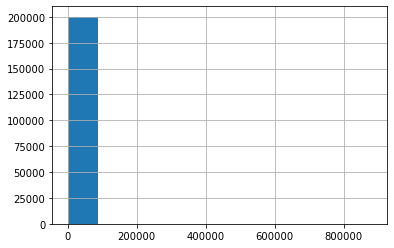

In [37]:
hauteur.max(skipna=True)
hauteur.hist()
# circonference = arbres.circonference_cm.values.reshape(-1,1)
# arbres.circonference_cm.values.reshape(-1,1)
